Install fastbook and Pytorch.


In [ ]:
!pip install torch
!pip install -Uqq fastbook
import fastbook

Import fastbook, files for colab, Image for our photos, and HTML to show a website.

In [ ]:
from fastbook import *
from google.colab import files
from IPython.display import Image
from IPython.display import HTML

Imports 48 menus of Thai food (Each menu has 300+ images) from Github and sets path.

In [ ]:
ls

Bird1.jpg  Bird3.jpg  Bird5.jpg  Bird7.jpg         sample_data/
Bird2.jpg  Bird4.jpg  Bird6.jpg  Bird-Nerd-v1.pkl  TTT-DB/


In [ ]:
!npx degit github:GemmyTheGeek/TTT-DB#master TTT-DB
path = Path('TTT-DB/images')

npx: installed 1 in 1.481s
! destination directory is not empty, aborting. Use --force to override


We have used path to check if all our images are in the files.

In [ ]:
path

Path('TTT-DB/images')

In [ ]:
path.ls()

(#3) [Path('TTT-DB/images/valid'),Path('TTT-DB/images/train'),Path('TTT-DB/images/test')]

In [ ]:
(path/"train").ls()

(#3) [Path('TTT-DB/images/train/2'),Path('TTT-DB/images/train/3'),Path('TTT-DB/images/train/1')]

In [ ]:
(path/"train/1").ls()

(#250) [Path('TTT-DB/images/train/1/0192.jpg'),Path('TTT-DB/images/train/1/0205.jpg'),Path('TTT-DB/images/train/1/0269.jpg'),Path('TTT-DB/images/train/1/0085.jpg'),Path('TTT-DB/images/train/1/0292.jpg'),Path('TTT-DB/images/train/1/0264.jpg'),Path('TTT-DB/images/train/1/0275.jpg'),Path('TTT-DB/images/train/1/0233.jpg'),Path('TTT-DB/images/train/1/0294.jpg'),Path('TTT-DB/images/train/1/0254.jpg')...]

GrandparentSpitter will seperate between the different sets and the X = image and Y = Menu name. We don't need to resize images because we already have images with 224 x 224 pixels. We also use augmentation because somepeople might take a photo of a dish and their photo is flipped. Then we set how many images are going to be in our batch.

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #x - image; y - single class
    get_items=get_image_files, #get image
    splitter=GrandparentSplitter(), #use parent folder as train-valid split
    get_y=parent_label, #use parent folder as label
    #two choices for resizing and rationale
    #squishing to prevent cropping places without chips/raisins
    item_tfms=Resize(224, method=ResizeMethod.Squish), 
    # #cropping to preserve image quality; tried and doesn't work - peaked at 0.85 val acc
    # item_tfms=RandomResizedCrop(512),
    batch_tfms=aug_transforms(size=224, flip_vert=True), #standard fastai augmentation at size 512
    )
dls = dblock.dataloaders(path, bs=64) #batch size = 64

Show some part of our batch to check if our images have a problem or not.

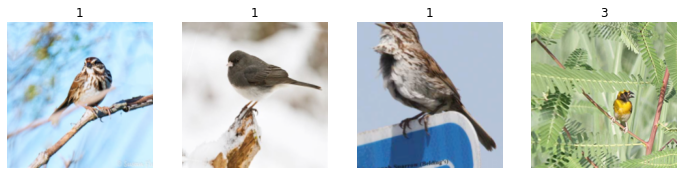

In [ ]:
dls.train.show_batch(max_n=4,nrows=1)

We are training our data set wiht "Architecture Resnet 34" and we are fine-tuning 10 times.

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.312326,0.216909,0.066667,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.489138,0.240235,0.106667,00:04
1,0.416203,0.138080,0.053333,00:04
2,0.326228,0.359396,0.093333,00:04
3,0.260890,0.503826,0.106667,00:04
4,0.221158,0.329940,0.093333,00:04
5,0.199753,0.325776,0.080000,00:04
6,0.170907,0.419473,0.106667,00:04
7,0.145998,0.334112,0.093333,00:04
8,0.128411,0.245318,0.066667,00:04
9,0.111388,0.270350,0.080000,00:04


Shows the confusion matrixs

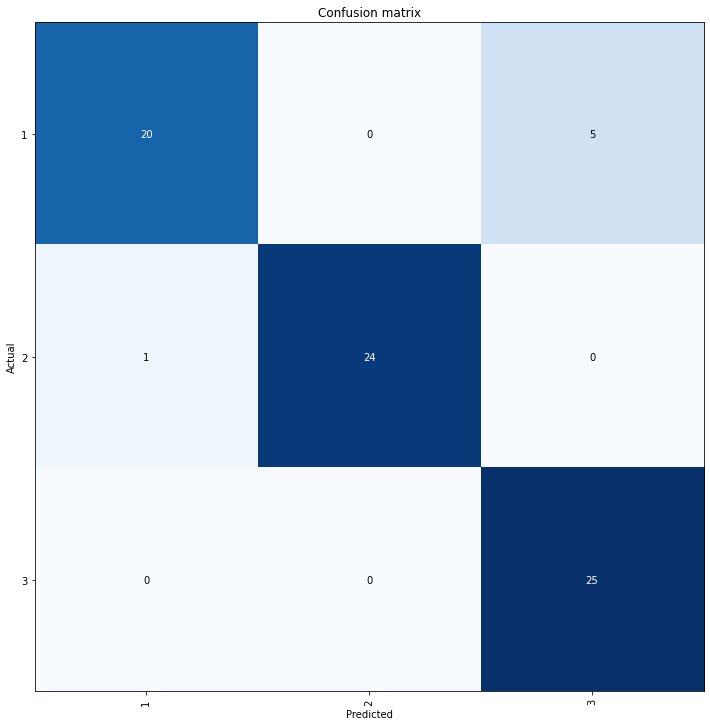

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

Tells you the label of all of the menu (00 - 47) Total = 48menus

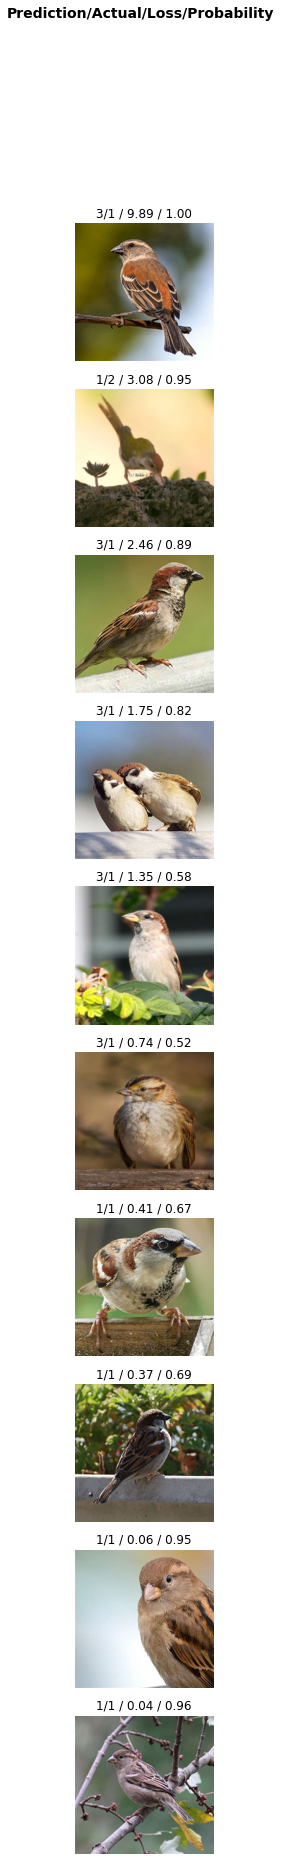

In [ ]:
interp.plot_top_losses(10, nrows=10)

Exports model so that we can use later

In [ ]:
exportfilename='Bird-Nerd-v1.pkl'
learn.export(exportfilename)
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('Bird-Nerd-v1.pkl')]

Downloads exported model to local computer

In [ ]:
files.download(exportfilename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Uploads our image file so we can predict it.

In [ ]:
uploaded = files.upload()

Saving Bird7.jpg to Bird7 (1).jpg


Check if our image file uploaded yet.

In [ ]:
ls

'Bird1 (1).jpg'   Bird3.jpg   Bird6.jpg          sample_data/
 Bird1.jpg        Bird4.jpg   Bird7.jpg          TTT-DB/
 Bird2.jpg        Bird5.jpg   Bird-Nerd-v1.pkl


Show image to check if it is the correct image that we want to test.

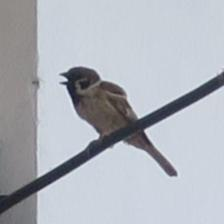

In [ ]:
imagetotest='Bird7.jpg'
Image(imagetotest)

Show all of the results.

In [ ]:
learn.predict(imagetotest)

('1', tensor(0), tensor([0.9362, 0.0600, 0.0038]))

Makes it easier to find what result we are looking for.

Uploads our model into our model.

In [ ]:
uploaded = files.upload()
path.ls(file_exts='.pkl')

KeyboardInterrupt: ignored

Load our model to learn_inf.

In [ ]:
learn_inf = load_learner('resnet34-10-v1.pkl')

In [ ]:
learn_inf.predict('Test1.jpg')